In [211]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.cluster import KMeans
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence
%matplotlib inline

In [212]:
df = pd.read_csv('laptopData.csv')

## "Причесать" датасет: удалить выбросы и дубли, обработать пропущенные значения, найти кривые данные и т.п.

In [213]:
df = df[df['Weight'].str.contains('kg')==True]
df = df[df['Weight'].str.contains(r'\d')==True]
df = df[df['Inches'].str.contains(r'\d')==True]
df = df[df['Memory'].str.contains('\?')==False]
df['Weight']=df['Weight'].str.extract(r'([0-9]{1}[0-9]*\.?[0-9]*)')
df['Weight'] =  pd.to_numeric(df['Weight'])
df['Price'] = pd.to_numeric(df['Price'])
df['Inches']=df['Inches'].str.extract(r'([0-9]{1}[0-9]*\.?[0-9]*)')
df['Inches'] =  pd.to_numeric(df['Inches'])
df['Ram']=df['Ram'].str.extract(r'([1-9]*)')
df['Ram'] =  pd.to_numeric(df['Ram'])
df['Cpu']=df['Cpu'].str.extract(r'([0-9]{1}[0-9]*\.?[0-9]*GHz)')
df['Cpu']=df['Cpu'].str.extract(r'([0-9]*\.?[0-9]*)')
df['Cpu'] =  pd.to_numeric(df['Cpu'])
df = df.set_index('Unnamed: 0')
df.index.names = [None]

In [214]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,2.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1.0,Apple,Ultrabook,13.3,1440x900,1.8,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2.0,HP,Notebook,15.6,Full HD 1920x1080,2.5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,2.7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,3.1,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


## Новый атрибут - цена за кг.

In [215]:
df['RubPerKilo'] = df['Price']/df['Weight']
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,RubPerKilo
0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,2.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,52101.228613
1.0,Apple,Ultrabook,13.3,1440x900,1.8,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,35742.927761
2.0,HP,Notebook,15.6,Full HD 1920x1080,2.5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,16470.967742
3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,2.7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,73877.232787
4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,3.1,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,70142.925547


##  уберём выбросы

In [216]:
threshold = 4/len(df.index)

f = 'Price ~ RubPerKilo'
model = ols(formula=f, data=df).fit()

#расстояние Кука
cook_distance = OLSInfluence(model).cooks_distance
(distance, p_value) = cook_distance
    

influencial_data = distance[distance > threshold]

for index, value in influencial_data.items():
    df.drop(index, axis = 0, inplace = True)

In [238]:
print(len(influencial_data.index));#количество удаленных выбросов

16


In [242]:
list(df['TypeName'].unique())

['Ultrabook',
 'Notebook',
 'Gaming',
 '2 in 1 Convertible',
 'Workstation',
 'Netbook']

In [ ]:
###

# Построить графики зависимости одной переменной от другой (plt.scatter), описать какие кластеры (группы) вы видите. Построить несколько разных графиков, найти ярковыраженные группы.

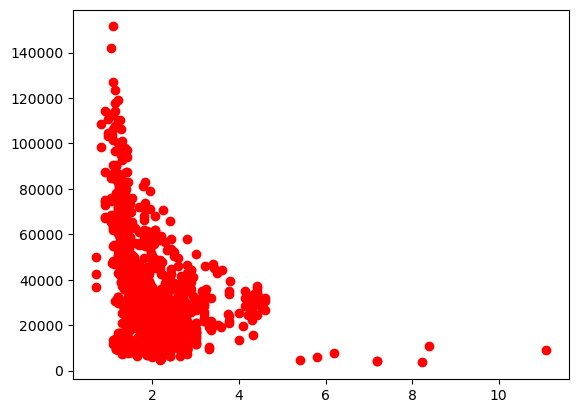

In [228]:
plt.scatter(x=df['Weight'], y=df['RubPerKilo'], c='Red')
plt.show();

## Здесь предпологаю, что вижу 3 кластера: (1,75;70000), (2;20000), (4.2;30000)

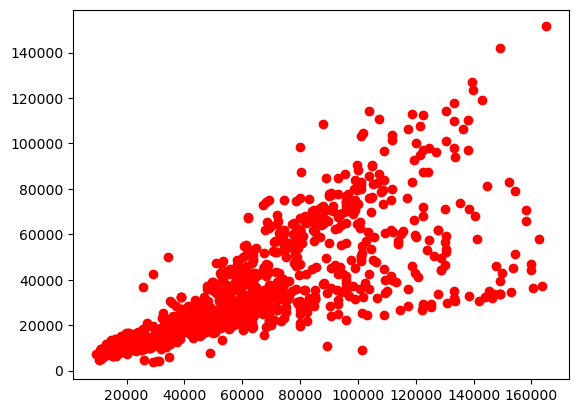

In [219]:
plt.scatter(x=df['Price'], y=df['RubPerKilo'], c='Red')
plt.show();

## Здесь тоже 3: (20000;40000),(80000;70000),(140000;50000)

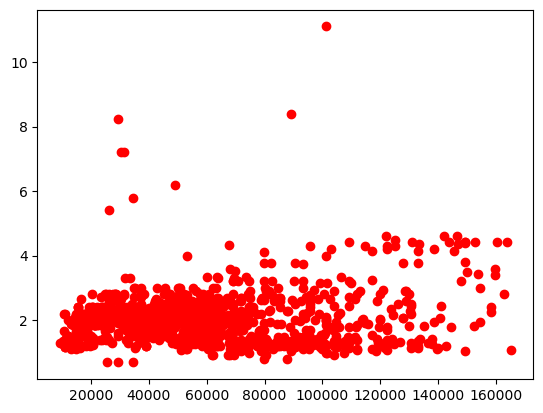

In [235]:
plt.scatter(x=df['Price'], y=df['Weight'], c='Red')
plt.show();

## И тут 3 кластера:(50000;2),(100000;1.75),(145000;4)

## другие графики зависимости строить не имеет смысла так как набор уникальных значений в столбцах сильно ограничен.

# Изучить перечисленные ноутбуки, по примеру, попробовать применить метод KMeans к вашему датасету 

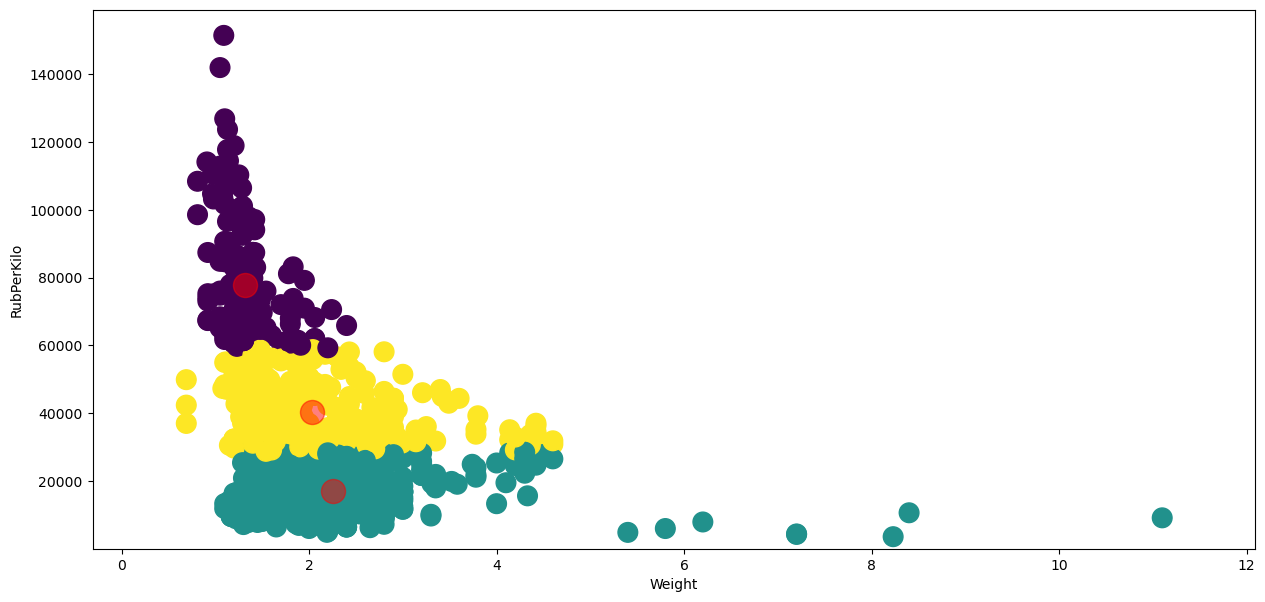

In [232]:
X1 = df[['Weight' , 'RubPerKilo']].iloc[: , :].values

algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.2
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1

y_min = y_min // 1000000000
y_max = y_max // 1000000000 + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Weight' ,y = 'RubPerKilo' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('RubPerKilo') , plt.xlabel('Weight')
plt.show()

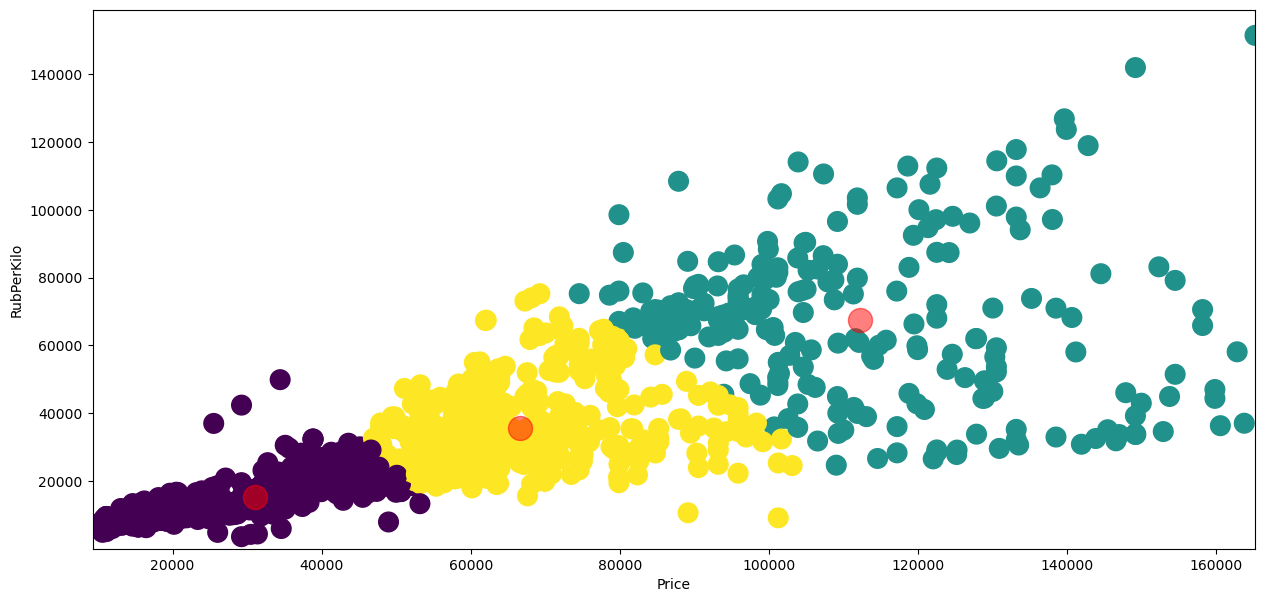

In [236]:
X1 = df[['Price' , 'RubPerKilo']].iloc[: , :].values

algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.2
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1

y_min = y_min // 1000000000
y_max = y_max // 1000000000 + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Price' ,y = 'RubPerKilo' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('RubPerKilo') , plt.xlabel('Price')
plt.show()

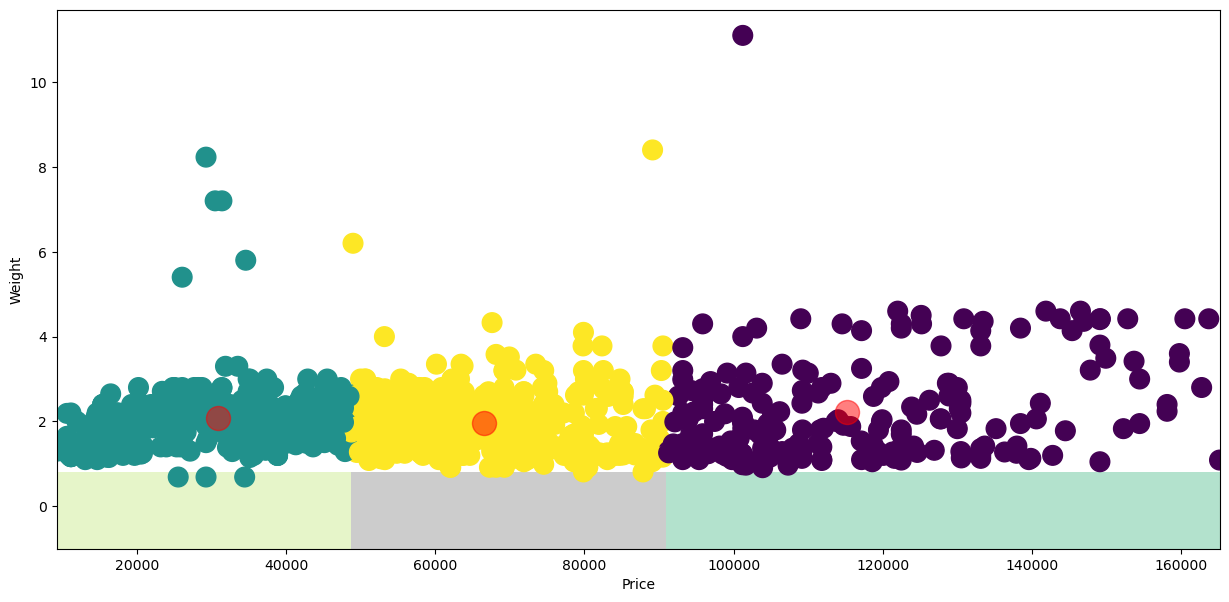

In [237]:
X1 = df[['Price' , 'Weight']].iloc[: , :].values

algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.2
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1

y_min = y_min // 1000000000
y_max = y_max // 1000000000 + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Price' ,y = 'Weight' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Weight') , plt.xlabel('Price')
plt.show()